In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forhomework/rock-rabbit-6565888_1280.jpg
/kaggle/input/forhomework/my result in kaggle.PNG
/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json
/kaggle/input/dm-2024-isa-5810-lab-2-homework/sampleSubmission.csv
/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv
/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv


### Student Information
Name: Kseniia Sholokhova

Student ID: d610112006

GitHub ID: wen-shu-xia

Kaggle name: 
Kseniia Sholokhova

Kaggle private scoreboard snapshot:

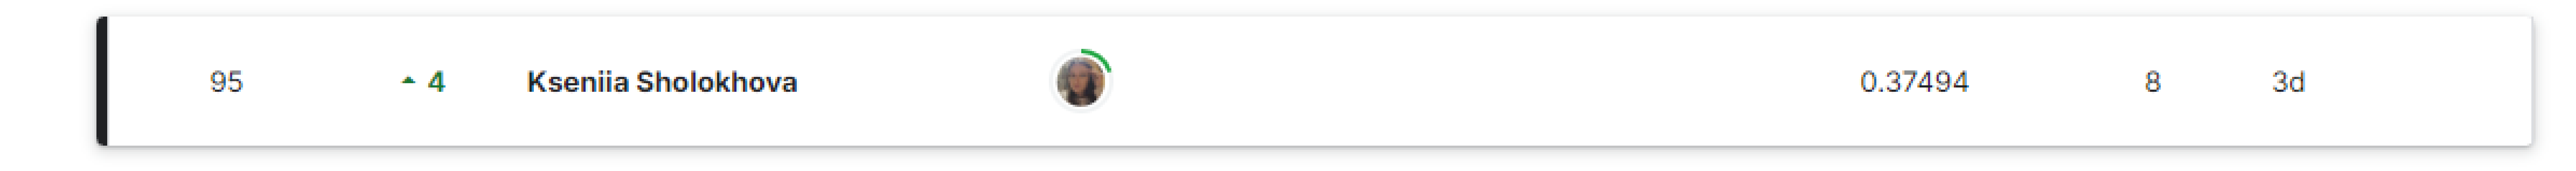

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

file_path = '/kaggle/input/forhomework/my result in kaggle.PNG'
image = Image.open(file_path)
plt.figure(figsize=(200, 20))
plt.imshow(image)
plt.axis('off')  
plt.show()

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

### Begin Assignment Here
The first part is finished and submitted in the DM2024-Lab2-master.

The second part is pasted in the student information.

The third part starts with Kaggle Competition models is provided in here

### Data Check-Up

In [3]:
#packages that needed for all notebook run

import pandas as pd
import numpy as np
import json
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import random
import xgboost
import sklearn
import re
import emoji
import tensorflow as tf
import keras

In [4]:
#let's see the data quickly
emotion = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv')
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [5]:
data_ident = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv')
data_ident

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [6]:
#this is how submission should look like
sample_submission = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/sampleSubmission.csv')
sample_submission

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


In [7]:
# quick scan of twitter data, first 10 records
with open('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json', 'r') as file:
    for _ in range(10): 
        line = file.readline()
        print(line)

{"_score": 391, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": ["Snapchat"], "tweet_id": "0x376b20", "text": "People who post \"add me on #Snapchat\" must be dehydrated. Cuz man.... that's <LH>"}}, "_crawldate": "2015-05-23 11:42:47", "_type": "tweets"}

{"_score": 433, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": ["freepress", "TrumpLegacy", "CNN"], "tweet_id": "0x2d5350", "text": "@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN"}}, "_crawldate": "2016-01-28 04:52:09", "_type": "tweets"}

{"_score": 232, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": ["bibleverse"], "tweet_id": "0x28b412", "text": "Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>"}}, "_crawldate": "2017-12-25 04:39:20", "_type": "tweets"}

{"_score": 376, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": [], "tweet

## Workflow One 

### Load the main data - from Twitter - in more friendly format, as a dataframe

In [8]:
#create an empty list and then for loop the lines from each tweet with separation
data_tweet = []

with open('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json', 'r') as file:
    for line in file:
        data = json.loads(line.strip())
        data_tweet.append(data)  

tweet_df = pd.DataFrame(data_tweet)
print(tweet_df)

         _score          _index  \
0           391  hashtag_tweets   
1           433  hashtag_tweets   
2           232  hashtag_tweets   
3           376  hashtag_tweets   
4           989  hashtag_tweets   
...         ...             ...   
1867530     827  hashtag_tweets   
1867531     368  hashtag_tweets   
1867532     498  hashtag_tweets   
1867533     840  hashtag_tweets   
1867534     360  hashtag_tweets   

                                                   _source  \
0        {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1        {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2        {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3        {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4        {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   
...                                                    ...   
1867530  {'tweet': {'hashtags': ['mixedfeeling', 'butim...   
1867531  {'tweet': {'hashtags': [], 'tweet_id': '0x29d0...   
1867532  {'tweet': {'

In [9]:
#now, it is more easier to understand as it is in dataframe
tweet_df

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


### Data Cleaning and Pre-Processing 

In [10]:
# although now, it is in dataframe but it still does not look nice, source should be more organized
tweet_df['_source']

0          {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...
1          {'tweet': {'hashtags': ['freepress', 'TrumpLeg...
2          {'tweet': {'hashtags': ['bibleverse'], 'tweet_...
3          {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...
4          {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...
                                 ...                        
1867530    {'tweet': {'hashtags': ['mixedfeeling', 'butim...
1867531    {'tweet': {'hashtags': [], 'tweet_id': '0x29d0...
1867532    {'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...
1867533    {'tweet': {'hashtags': [], 'tweet_id': '0x24fa...
1867534    {'tweet': {'hashtags': ['Sundayvibes'], 'tweet...
Name: _source, Length: 1867535, dtype: object

In [11]:
#by lambda we can organize it into the separate columns,
#looks like it has tweet
tweet_df['tweet'] = tweet_df['_source'].apply(lambda x: x.get('tweet'))

In [12]:
# creatung a tweet_id column
tweet_df['tweet_id'] = tweet_df['tweet'].apply(lambda x: x.get('tweet_id'))

In [13]:
#for text
tweet_df['text'] = tweet_df['tweet'].apply(lambda x: x.get('text'))

In [14]:
#hashtags
tweet_df['hashtags'] = tweet_df['tweet'].apply(lambda x: x.get('hashtags'))

In [15]:
tweet_df

,_score,_index,_source,_crawldate,_type,tweet,tweet_id,text,hashtags
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat]
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]"
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse]
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[]
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",0x2de201,"""Trust is not the same as faith. A friend is s...",[]
...,...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...",0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]"
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",0x29d0cb,I swear all this hard work gone pay off one da...,[]
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text...",0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[]
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",0x24faed,"Ah, corporate life, where you can date <LH> us...",[]


In [16]:
#some of the columns are useless at this point
tweet_df = tweet_df.drop(["_index", "_source", "_type", "tweet"], axis =1)

In [17]:
#check-up
tweet_df

,_score,_crawldate,tweet_id,text,hashtags
0,391,2015-05-23 11:42:47,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat]
1,433,2016-01-28 04:52:09,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]"
2,232,2017-12-25 04:39:20,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse]
3,376,2016-01-24 23:53:05,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[]
4,989,2016-01-08 17:18:59,0x2de201,"""Trust is not the same as faith. A friend is s...",[]
...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]"
1867531,368,2017-10-02 17:54:04,0x29d0cb,I swear all this hard work gone pay off one da...,[]
1867532,498,2016-10-10 11:04:32,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[]
1867533,840,2016-09-02 14:25:06,0x24faed,"Ah, corporate life, where you can date <LH> us...",[]


In [18]:
#merging the dataset with identification to train or test
new_df = pd.merge(tweet_df, data_ident, on="tweet_id", how="inner")
new_df

,_score,_crawldate,tweet_id,text,hashtags,identification
0,391,2015-05-23 11:42:47,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],train
1,433,2016-01-28 04:52:09,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",train
2,232,2017-12-25 04:39:20,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],test
3,376,2016-01-24 23:53:05,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],train
4,989,2016-01-08 17:18:59,0x2de201,"""Trust is not the same as faith. A friend is s...",[],test
...,...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]",test
1867531,368,2017-10-02 17:54:04,0x29d0cb,I swear all this hard work gone pay off one da...,[],test
1867532,498,2016-10-10 11:04:32,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[],test
1867533,840,2016-09-02 14:25:06,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],train


In [19]:
#now, we can separate train and test data
# for train
train_df = new_df[new_df["identification"] == "train"]
train_df

,_score,_crawldate,tweet_id,text,hashtags,identification
0,391,2015-05-23 11:42:47,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],train
1,433,2016-01-28 04:52:09,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",train
3,376,2016-01-24 23:53:05,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],train
5,120,2015-06-11 04:44:05,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[authentic, LaughOutLoud]",train
6,1021,2015-08-18 02:30:07,0x2c91a8,Still waiting on those supplies Liscus. <LH>,[],train
...,...,...,...,...,...,...
1867526,94,2016-12-26 02:44:07,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,"[NoWonder, Happy]",train
1867527,627,2015-04-01 08:14:56,0x38959e,In every circumtance I'd like to be thankful t...,[],train
1867528,274,2016-11-17 23:46:22,0x2cbca6,there's currently two girls walking around the...,[blessyou],train
1867533,840,2016-09-02 14:25:06,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],train


In [20]:
#identification column seems useless
train_df = train_df.drop("identification", axis =1)
train_df

,_score,_crawldate,tweet_id,text,hashtags
0,391,2015-05-23 11:42:47,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat]
1,433,2016-01-28 04:52:09,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]"
3,376,2016-01-24 23:53:05,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[]
5,120,2015-06-11 04:44:05,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[authentic, LaughOutLoud]"
6,1021,2015-08-18 02:30:07,0x2c91a8,Still waiting on those supplies Liscus. <LH>,[]
...,...,...,...,...,...
1867526,94,2016-12-26 02:44:07,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,"[NoWonder, Happy]"
1867527,627,2015-04-01 08:14:56,0x38959e,In every circumtance I'd like to be thankful t...,[]
1867528,274,2016-11-17 23:46:22,0x2cbca6,there's currently two girls walking around the...,[blessyou]
1867533,840,2016-09-02 14:25:06,0x24faed,"Ah, corporate life, where you can date <LH> us...",[]


In [21]:
#make a test dataset
test_df = new_df[new_df["identification"] == "test"]

In [22]:
#double check
test_df = test_df.drop("identification", axis =1)
test_df

,_score,_crawldate,tweet_id,text,hashtags
2,232,2017-12-25 04:39:20,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse]
4,989,2016-01-08 17:18:59,0x2de201,"""Trust is not the same as faith. A friend is s...",[]
9,66,2015-09-09 09:22:55,0x218443,When do you have enough ? When are you satisfi...,"[materialism, money, possessions]"
30,104,2015-10-10 14:33:26,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[GodsPlan, GodsWork]"
33,310,2016-10-23 08:49:50,0x26289a,"In these tough times, who do YOU turn to as yo...",[]
...,...,...,...,...,...
1867525,602,2016-12-10 18:01:00,0x2913b4,"""For this is the message that ye heard from th...",[]
1867529,598,2015-01-04 14:40:55,0x2a980e,"""There is a lad here, which hath five barley l...",[]
1867530,827,2015-05-12 12:51:52,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]"
1867531,368,2017-10-02 17:54:04,0x29d0cb,I swear all this hard work gone pay off one da...,[]


In [23]:
#add labels to the train set, because only train set we know real emotions
train_df = pd.merge(train_df, emotion, on="tweet_id", how="inner")
train_df

,_score,_crawldate,tweet_id,text,hashtags,emotion
0,391,2015-05-23 11:42:47,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation
1,433,2016-01-28 04:52:09,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",sadness
2,376,2016-01-24 23:53:05,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],fear
3,120,2015-06-11 04:44:05,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[authentic, LaughOutLoud]",joy
4,1021,2015-08-18 02:30:07,0x2c91a8,Still waiting on those supplies Liscus. <LH>,[],anticipation
...,...,...,...,...,...,...
1455558,94,2016-12-26 02:44:07,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,"[NoWonder, Happy]",joy
1455559,627,2015-04-01 08:14:56,0x38959e,In every circumtance I'd like to be thankful t...,[],joy
1455560,274,2016-11-17 23:46:22,0x2cbca6,there's currently two girls walking around the...,[blessyou],joy
1455561,840,2016-09-02 14:25:06,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],joy


In [24]:
#we also want to transform the emotions into friendly format for ML and DL
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['emotion_le'] = le.fit_transform(train_df['emotion'])

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455563 entries, 0 to 1455562
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   _score      1455563 non-null  int64 
 1   _crawldate  1455563 non-null  object
 2   tweet_id    1455563 non-null  object
 3   text        1455563 non-null  object
 4   hashtags    1455563 non-null  object
 5   emotion     1455563 non-null  object
 6   emotion_le  1455563 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 77.7+ MB


### Simple EDA for some hints and insights about the data

#### What are the top 30 most frequent words at the baseline?

In [26]:
#top 30 freq words in a random sample of 10000 

from sklearn.feature_extraction.text import CountVectorizer

sample_size = 10000
random_sample = train_df.sample(n=sample_size, random_state=42)

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(random_sample['text'])
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (1, 22235)>
  Coords	Values
  (0, 2408)	1
  (0, 21414)	1
  (0, 14087)	1
  (0, 17904)	1
  (0, 11655)	1
  (0, 13430)	2
  (0, 13099)	1
  (0, 12988)	1
  (0, 9133)	1
  (0, 17667)	1
  (0, 10219)	1
  (0, 21304)	1
  (0, 7653)	1
  (0, 21640)	1
  (0, 2546)	1
  (0, 922)	1


In [27]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [28]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

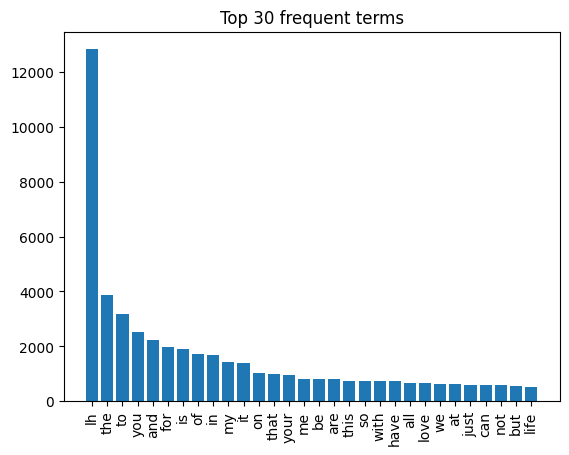

In [29]:
x = count_vect.get_feature_names_out()
y = term_frequencies

df = pd.DataFrame({'Term': x,'Frequency': y})
df_new = df.sort_values(by="Frequency", ascending=False)
df_new = df_new.head(30)

plt.bar(df_new['Term'], df_new['Frequency']) 
plt.xticks(rotation=90)
plt.title("Top 30 frequent terms")
plt.show()

#### What is the labels distribution in our dataset?

In [30]:
#let's check the count first
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

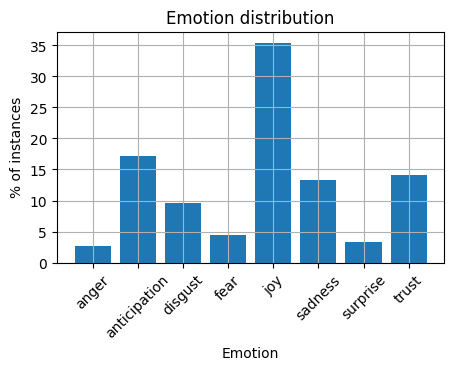

In [31]:
#that confirmed the imbalance of the classes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,7))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Feature Extraction

#### plan A - TFIDF
referring to this documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)

In [33]:
vectorizer.fit(train_df['text'])

TfidfVectorizer(max_features=500)

In [34]:
#get the TFIDF features
train_data_Tfidf_features = vectorizer.transform(train_df['text'])
test_data_Tfidf_features = vectorizer.transform(test_df['text'])

In [35]:
#the dimensions are huge already
train_data_Tfidf_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11985772 stored elements and shape (1455563, 500)>

In [36]:
#transform to array, and we see sparsity
train_data_Tfidf_features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18880124, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
feature_names_Tfidf_train = vectorizer.get_feature_names_out()
feature_names_Tfidf_train[50:100]

array(['be', 'beautiful', 'because', 'become', 'bed', 'been', 'before',
       'being', 'believe', 'best', 'better', 'big', 'birthday', 'black',
       'bless', 'blessed', 'blessings', 'book', 'both', 'bring',
       'business', 'but', 'buy', 'by', 'call', 'called', 'came', 'can',
       'cannot', 'car', 'care', 'cause', 'change', 'christ', 'christmas',
       'class', 'closed', 'come', 'comes', 'coming', 'cool', 'could',
       'country', 'crazy', 'damn', 'day', 'days', 'did', 'didn',
       'different'], dtype=object)

### Modeling

#### XGBOOST
Can we predict the emotions by using top 500 tfidf features and xgboost classifier?

In [38]:
#import the package for xgboost
from xgboost import XGBClassifier

# because classes are imbalanced, we want to know the class weight
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['emotion_le']),
    y=train_df['emotion_le']
)

In [39]:
#if provide these weights, then we can handle the imbalances
class_weights

array([4.56380904, 0.73089511, 1.30800911, 2.84294091, 0.3525957 ,
       0.94059242, 3.73382124, 0.88547375])

In [40]:
#store in a dictionary
class_dict = dict(enumerate(class_weights))
print(class_dict)

{0: 4.563809040058193, 1: 0.7308951131821559, 2: 1.308009108489515, 3: 2.8429409053266457, 4: 0.35259569936649376, 5: 0.9405924151015577, 6: 3.733821235814402, 7: 0.885473749014493}


In [41]:
#later, we can input sample weights into the xgboost model
sample_weights = train_df['emotion_le'].map(lambda x: class_dict[x])

In [42]:
#define the baseline model
model = XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1
)

In [43]:
#fit the model and consider the sample weights
model.fit(
    train_data_Tfidf_features,
    train_df['emotion_le'],
    sample_weight=sample_weights
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Because XGBoost might highly benefit from hyperparameter tuning, we can tune it before submitting for the predictions

In [44]:
#set the list of the parameters
hyperparameters = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01,0.05, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [45]:
#to speed up perform a random sampling 
fraction = 0.2
random_sample = train_df.sample(frac=fraction, random_state=42)

In [46]:
new_features = train_data_Tfidf_features[random_sample.index, :]
new_labels = random_sample['emotion_le']

In [47]:
#random search is faster than grid search and might be more robust for the competition purpose
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparameters,
    n_iter=3,  #for the fast execution here, origininally n_iter=5 was implemented 
    scoring='f1_macro', #because we need to get the best f1
    cv=3,  #for the fast execution here, origininally cv=5 was implemented
    verbose=2,
    random_state=42
)

In [48]:
random_search.fit(new_features, new_labels)
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.6; total time=  23.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.6; total time=  23.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.6; total time=  23.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=2, min_child_weight=1, n_estimators=150, subsample=0.8; total time=  19.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=2, min_child_weight=1, n_estimators=150, subsample=0.8; total time=  20.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=2, min_child_weight=1, n_estimators=150, subsample=0.8; total time=  20.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=

After that, we've got that:

Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Best F1-Score: 0.27778712481205925

In [49]:
#input tuned parameters into xgboost

In [50]:
# simply the best
hyperparameters = {
    'n_estimators': 200,
    'min_child_weight': 5,
    'max_depth': 2,
    'learning_rate': 0.2,
    'colsample_bytree': 1.0 
}

In [51]:
# I found that if we specified how many classes we have, we might improve the prediction
best_model = XGBClassifier(
    objective='multi:softmax', #for addressing multi class classification problem
    num_class=8,  # we can explicitely specify the number of emotions that we want to predict
    use_label_encoder=False, #as we already encoded it before
    **hyperparameters # much better than copy and paste
)

In [52]:
# fitting! and all features and all dataset
best_model.fit(train_data_Tfidf_features, train_df['emotion_le'])
y_pred = best_model.predict(test_data_Tfidf_features)

In [53]:
#submition to kaggle
pred_emotions = le.inverse_transform(y_pred)

In [54]:
submission = test_df[['tweet_id']].copy() 
submission['emotion'] = pred_emotions

In [55]:
submission.rename(columns={'tweet_id': 'id'}, inplace=True)

In [56]:
submission_file = 'submission.csv'
submission.to_csv(submission_file, index=False)

#### Result of this submission
Setting: simple pre-processing, generation of TFIDF features (n=500), applying class weights and tuned XGBoost

Submission Private Score: f1=0.30

### Random Forest

Can we predict emotions only using TFIDF features by RF?

In [57]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 3, 5],
    'max_depth': [None, 2, 3],
    'bootstrap': [True, False]
}

In [58]:
#the same procedure as for xgboost
#to speed up perform a random sampling 
fraction = 0.2
random_sample = train_df.sample(frac=fraction, random_state=42)

In [59]:
new_features = train_data_Tfidf_features[random_sample.index, :]
new_labels = random_sample['emotion_le']

In [60]:
# random search CV for finding out what are the best parameters
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=hyperparameters,
    n_iter=3,  #originally 5
    scoring='f1_macro',  
    cv=3, #originally 5
    verbose=2,
    random_state=42,
    n_jobs=1  
)

In [61]:
#fitting!
random_search_rf.fit(new_features, new_labels)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  15.3s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  14.5s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  15.9s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.0s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.5s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.6s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  12.1s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  11.4s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 3],
                                        'min_samples_leaf': [2, 3, 5],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [62]:
print("Best Parameters:", random_search_rf.best_params_)
print("Best Macro F1-Score:", random_search_rf.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 3, 'bootstrap': False}
Best Macro F1-Score: 0.08790163392489692


After that, we've got that:

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': False}

Best Macro F1-Score: 0.3088039831945576

In [63]:
#let's input them here

rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=3,
    max_depth=None,
    bootstrap=False,
    random_state=42,  
    n_jobs=-1 
)

In [64]:
# fit on the whole data
# this takes a while, around 2 hour
rf_model.fit(train_data_Tfidf_features, train_df['emotion_le'])
#predict on test
y_pred = rf_model.predict(test_data_Tfidf_features)


KeyboardInterrupt



In [ ]:
#submit to kaggle
pred_emotions = le.inverse_transform(y_pred)
submission = test_df[['tweet_id']].copy() 
submission['emotion'] = pred_emotions
submission.rename(columns={'tweet_id': 'id'}, inplace=True)
submission_file = 'submission_new_try_TFIDF_RF.csv'
submission.to_csv(submission_file, index=False)

# Workflow Two

from this experience, I learned that I might need to process data more...

### More advanced Pre-Procesing 

In [65]:
#let's look at the data again, how do these tweets look like
print(new_df.loc[0, 'text'])
print(new_df.loc[1, 'text'])
print(new_df.loc[2, 'text'])
print(new_df.loc[3, 'text'])
print(new_df.loc[4, 'text'])

People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that's <LH>
@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN
Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>
Now ISSA is stalking Tasha 😂😂😂 <LH>
"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>


The text is filled with:

1. LH, I am not sure what it is, but seems redundant
2. emojies
3. there are urls and mentioning of other people
5. some word shortenings like aren't or doesn'
6. upper letters might affect the word count

In [66]:
#let's remove all LH, just replace it with empty space 
new_df['text'] = new_df['text'].str.replace('<LH>', '', regex=False)
new_df['text']

0          People who post "add me on #Snapchat" must be ...
1          @brianklaas As we see, Trump is dangerous to #...
2          Confident of your obedience, I write to you, k...
3                            Now ISSA is stalking Tasha 😂😂😂 
4          "Trust is not the same as faith. A friend is s...
                                 ...                        
1867530    When you buy the last 2 tickets remaining for ...
1867531    I swear all this hard work gone pay off one da...
1867532    @Parcel2Go no card left when I wasn't in so I ...
1867533    Ah, corporate life, where you can date  using ...
1867534                   Blessed to be living #Sundayvibes 
Name: text, Length: 1867535, dtype: object

In [67]:
#let's remove all emoji, there is a package on internet for that
#if needed to install first

!pip install emoji

import emoji

#demojize help us to remove the emojis
new_df['text'] = [emoji.demojize(text) for text in new_df['text']]

#check this out
new_df['text']

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


0          People who post "add me on #Snapchat" must be ...
1          @brianklaas As we see, Trump is dangerous to #...
2          Confident of your obedience, I write to you, k...
3          Now ISSA is stalking Tasha :face_with_tears_of...
4          "Trust is not the same as faith. A friend is s...
                                 ...                        
1867530    When you buy the last 2 tickets remaining for ...
1867531    I swear all this hard work gone pay off one da...
1867532    @Parcel2Go no card left when I wasn't in so I ...
1867533    Ah, corporate life, where you can date  using ...
1867534                   Blessed to be living #Sundayvibes 
Name: text, Length: 1867535, dtype: object

In [68]:
#i noticed that if we count the value of words, the same word but if started with upper case will be considered different
#for instance, if we do value_count for cat and Cat, these are two different counts
#we can make all letters lowercase to improve the statistics and word representation

new_df['text'] = new_df['text'].str.lower()

#check this out
new_df['text']

0          people who post "add me on #snapchat" must be ...
1          @brianklaas as we see, trump is dangerous to #...
2          confident of your obedience, i write to you, k...
3          now issa is stalking tasha :face_with_tears_of...
4          "trust is not the same as faith. a friend is s...
                                 ...                        
1867530    when you buy the last 2 tickets remaining for ...
1867531    i swear all this hard work gone pay off one da...
1867532    @parcel2go no card left when i wasn't in so i ...
1867533    ah, corporate life, where you can date  using ...
1867534                   blessed to be living #sundayvibes 
Name: text, Length: 1867535, dtype: object

In [69]:
# we want to remove mentions 
# like @brianklaas 
# first we can define what we want to remove by special syntax

# \S - is any non-space, basically anything after @
we_want_to_replace = r'@\S+'

#as before we will use str.replace
new_df['text'] = new_df['text'].str.replace(we_want_to_replace, '', regex=True)

#check this out
new_df['text']

0          people who post "add me on #snapchat" must be ...
1           as we see, trump is dangerous to #freepress a...
2          confident of your obedience, i write to you, k...
3          now issa is stalking tasha :face_with_tears_of...
4          "trust is not the same as faith. a friend is s...
                                 ...                        
1867530    when you buy the last 2 tickets remaining for ...
1867531    i swear all this hard work gone pay off one da...
1867532     no card left when i wasn't in so i have no id...
1867533    ah, corporate life, where you can date  using ...
1867534                   blessed to be living #sundayvibes 
Name: text, Length: 1867535, dtype: object

In [70]:
#the same way we can remove urls
#has www

we_want_to_replace_all_www = r'www\.\S+'
we_want_to_replace_all_https =  r'http[s]?://\S+'

#remove

new_df['text'] = new_df['text'].str.replace(we_want_to_replace_all_www, '', regex=True)
new_df['text'] = new_df['text'].str.replace(we_want_to_replace_all_https, '', regex=True)

new_df['text']

0          people who post "add me on #snapchat" must be ...
1           as we see, trump is dangerous to #freepress a...
2          confident of your obedience, i write to you, k...
3          now issa is stalking tasha :face_with_tears_of...
4          "trust is not the same as faith. a friend is s...
                                 ...                        
1867530    when you buy the last 2 tickets remaining for ...
1867531    i swear all this hard work gone pay off one da...
1867532     no card left when i wasn't in so i have no id...
1867533    ah, corporate life, where you can date  using ...
1867534                   blessed to be living #sundayvibes 
Name: text, Length: 1867535, dtype: object

In [71]:
#some of the words are shortened like aren't or isn', contractions can help to transform them into are not, is not full versions
# contractions package needs to be installed in kaggle environment
!pip install contractions

import contractions
from contractions import fix

#do the removal
new_df['text'] = new_df['text'].apply(fix)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.7 MB/s eta 0:00:00


In [72]:
#how the text looks like now?

print(new_df.loc[0, 'text'])
print(new_df.loc[1, 'text'])
print(new_df.loc[2, 'text'])
print(new_df.loc[3, 'text'])
print(new_df.loc[4, 'text'])

people who post "add me on #snapchat" must be dehydrated. cuz man.... that is 
 as we see, trump is dangerous to #freepress around the world. what a   #trumplegacy.  #cnn
confident of your obedience, i write to you, knowing that you will do even more than i ask. (philemon 1:21) 3/4 #bibleverse  
now issa is stalking tasha :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy: 
"trust is not the same as faith. a friend is someone you trust. putting faith in anyone is a mistake." ~ christopher hitchens  


In [73]:
#remember example of Spanish words for run has so many forms
#finally we can remove stopwords and do stemming
#we need to do it together
#importing & downloading all needed packages first
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
#define the stemmer and stopwords in English language
PS = PorterStemmer()
stopwords = set(stopwords.words('english'))

#maybe by function is the best way
def stop_words_and_stemmer(text):
    no_stopwords = [word for word in text.split() if word not in stopwords]
    final_words = [PS.stem(word) for word in no_stopwords]
    return ' '.join(final_words)

In [75]:
new_df['text'] = new_df['text'].apply(stop_words_and_stemmer)
new_df['text']

0          peopl post "add #snapchat" must dehydrated. cu...
1          see, trump danger #freepress around world. #tr...
2          confid obedience, write you, know even ask. (p...
3          issa stalk tasha :face_with_tears_of_joy::face...
4          "trust faith. friend someon trust. put faith a...
                                 ...                        
1867530    buy last 2 ticket remain show sell out.. #mixe...
1867531    swear hard work gone pay one day:smiling_face_...
1867532                            card left idea get parcel
1867533    ah, corpor life, date use rel anachron last jo...
1867534                                bless live #sundayvib
Name: text, Length: 1867535, dtype: object

In [76]:
#after preprocessing text looks like this now:
print(new_df.loc[0, 'text'])
print(new_df.loc[1, 'text'])
print(new_df.loc[2, 'text'])
print(new_df.loc[3, 'text'])
print(new_df.loc[4, 'text'])

peopl post "add #snapchat" must dehydrated. cuz man....
see, trump danger #freepress around world. #trumplegacy. #cnn
confid obedience, write you, know even ask. (philemon 1:21) 3/4 #biblevers
issa stalk tasha :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:
"trust faith. friend someon trust. put faith anyon mistake." ~ christoph hitchen


In [77]:
#final look
new_df

,_score,_crawldate,tweet_id,text,hashtags,identification
0,391,2015-05-23 11:42:47,0x376b20,"peopl post ""add #snapchat"" must dehydrated. cu...",[Snapchat],train
1,433,2016-01-28 04:52:09,0x2d5350,"see, trump danger #freepress around world. #tr...","[freepress, TrumpLegacy, CNN]",train
2,232,2017-12-25 04:39:20,0x28b412,"confid obedience, write you, know even ask. (p...",[bibleverse],test
3,376,2016-01-24 23:53:05,0x1cd5b0,issa stalk tasha :face_with_tears_of_joy::face...,[],train
4,989,2016-01-08 17:18:59,0x2de201,"""trust faith. friend someon trust. put faith a...",[],test
...,...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,0x316b80,buy last 2 ticket remain show sell out.. #mixe...,"[mixedfeeling, butimTHATperson]",test
1867531,368,2017-10-02 17:54:04,0x29d0cb,swear hard work gone pay one day:smiling_face_...,[],test
1867532,498,2016-10-10 11:04:32,0x2a6a4f,card left idea get parcel,[],test
1867533,840,2016-09-02 14:25:06,0x24faed,"ah, corpor life, date use rel anachron last jo...",[],train


In [78]:
#divide on train and test sets based on identifier
# for train
train_df = new_df[new_df["identification"] == "train"]

In [79]:
train_df = train_df.drop("identification", axis =1)
train_df

,_score,_crawldate,tweet_id,text,hashtags
0,391,2015-05-23 11:42:47,0x376b20,"peopl post ""add #snapchat"" must dehydrated. cu...",[Snapchat]
1,433,2016-01-28 04:52:09,0x2d5350,"see, trump danger #freepress around world. #tr...","[freepress, TrumpLegacy, CNN]"
3,376,2016-01-24 23:53:05,0x1cd5b0,issa stalk tasha :face_with_tears_of_joy::face...,[]
5,120,2015-06-11 04:44:05,0x1d755c,thank best time tonight. stories! heartbreakin...,"[authentic, LaughOutLoud]"
6,1021,2015-08-18 02:30:07,0x2c91a8,still wait suppli liscus.,[]
...,...,...,...,...,...
1867526,94,2016-12-26 02:44:07,0x321566,happy!!! #nowond name show! #happy! :clapping_...,"[NoWonder, Happy]"
1867527,627,2015-04-01 08:14:56,0x38959e,everi circumt would like thank almighti jesu c...,[]
1867528,274,2016-11-17 23:46:22,0x2cbca6,current two girl walk around librari hand red ...,[blessyou]
1867533,840,2016-09-02 14:25:06,0x24faed,"ah, corpor life, date use rel anachron last jo...",[]


In [80]:
#for test
test_df = new_df[new_df["identification"] == "test"]

In [81]:
test_df = test_df.drop("identification", axis =1)
test_df

,_score,_crawldate,tweet_id,text,hashtags
2,232,2017-12-25 04:39:20,0x28b412,"confid obedience, write you, know even ask. (p...",[bibleverse]
4,989,2016-01-08 17:18:59,0x2de201,"""trust faith. friend someon trust. put faith a...",[]
9,66,2015-09-09 09:22:55,0x218443,enough ? satisfi ? goal realli money ? #materi...,"[materialism, money, possessions]"
30,104,2015-10-10 14:33:26,0x2939d5,"god woke up, chase day #godsplan #godswork","[GodsPlan, GodsWork]"
33,310,2016-10-23 08:49:50,0x26289a,"tough times, turn symbol hope?",[]
...,...,...,...,...,...
1867525,602,2016-12-10 18:01:00,0x2913b4,"""for messag ye heard beginning, love one anoth...",[]
1867529,598,2015-01-04 14:40:55,0x2a980e,"""there lad here, hath five barley loaves, two ...",[]
1867530,827,2015-05-12 12:51:52,0x316b80,buy last 2 ticket remain show sell out.. #mixe...,"[mixedfeeling, butimTHATperson]"
1867531,368,2017-10-02 17:54:04,0x29d0cb,swear hard work gone pay one day:smiling_face_...,[]


In [82]:
#add labels of emotions to the train df
train_df = pd.merge(train_df, emotion, on="tweet_id", how="inner")
train_df

,_score,_crawldate,tweet_id,text,hashtags,emotion
0,391,2015-05-23 11:42:47,0x376b20,"peopl post ""add #snapchat"" must dehydrated. cu...",[Snapchat],anticipation
1,433,2016-01-28 04:52:09,0x2d5350,"see, trump danger #freepress around world. #tr...","[freepress, TrumpLegacy, CNN]",sadness
2,376,2016-01-24 23:53:05,0x1cd5b0,issa stalk tasha :face_with_tears_of_joy::face...,[],fear
3,120,2015-06-11 04:44:05,0x1d755c,thank best time tonight. stories! heartbreakin...,"[authentic, LaughOutLoud]",joy
4,1021,2015-08-18 02:30:07,0x2c91a8,still wait suppli liscus.,[],anticipation
...,...,...,...,...,...,...
1455558,94,2016-12-26 02:44:07,0x321566,happy!!! #nowond name show! #happy! :clapping_...,"[NoWonder, Happy]",joy
1455559,627,2015-04-01 08:14:56,0x38959e,everi circumt would like thank almighti jesu c...,[],joy
1455560,274,2016-11-17 23:46:22,0x2cbca6,current two girl walk around librari hand red ...,[blessyou],joy
1455561,840,2016-09-02 14:25:06,0x24faed,"ah, corpor life, date use rel anachron last jo...",[],joy


In [103]:
#we also want to transform the emotions into friendly format for ML and DL
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['emotion_le'] = le.fit_transform(train_df['emotion'])

### how does top 30 words looks right now?

In [83]:
#top 30 freq words in a random sample of 10000 

from sklearn.feature_extraction.text import CountVectorizer

sample_size = 10000
random_sample = train_df.sample(n=sample_size, random_state=42)

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(random_sample['text'])
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (1, 16933)>
  Coords	Values
  (0, 16250)	1
  (0, 13494)	1
  (0, 9875)	1
  (0, 9798)	1
  (0, 7099)	1
  (0, 13326)	1
  (0, 7956)	1
  (0, 16154)	1
  (0, 5876)	1
  (0, 16447)	1
  (0, 2004)	1
  (0, 795)	1


In [84]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [85]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

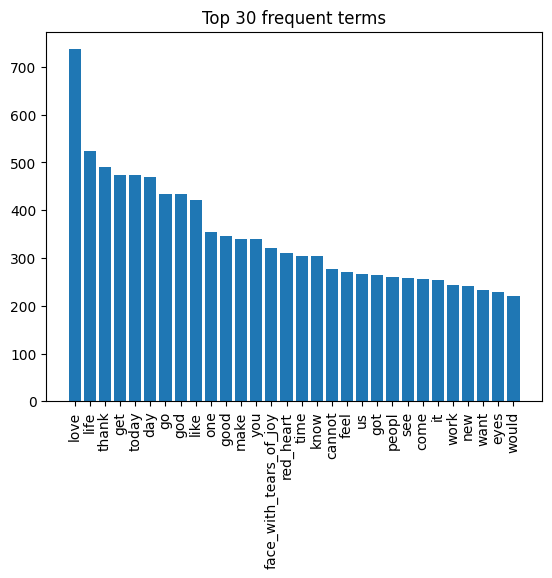

In [86]:
x = count_vect.get_feature_names_out()
y = term_frequencies

df = pd.DataFrame({'Term': x,'Frequency': y})
df_new = df.sort_values(by="Frequency", ascending=False)
df_new = df_new.head(30)

plt.bar(df_new['Term'], df_new['Frequency']) 
plt.xticks(rotation=90)
plt.title("Top 30 frequent terms")
plt.show()

### Feature extraction

#### Plan B - TFIDF (n=1000)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

In [88]:
vectorizer.fit(train_df['text'])

TfidfVectorizer(max_features=1000)

In [89]:
train_data_Tfidf_features = vectorizer.transform(train_df['text'])
test_data_Tfidf_features = vectorizer.transform(test_df['text'])

In [90]:
train_data_Tfidf_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6673199 stored elements and shape (1455563, 1000)>

In [91]:
train_data_Tfidf_features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
feature_names_Tfidf_train = vectorizer.get_feature_names_out()
feature_names_Tfidf_train[100:110]

array(['away', 'awesom', 'awesome', 'awkward', 'babi', 'back', 'bad',
       'baffl', 'bag', 'ball'], dtype=object)

#### Plan C - Bag of Words (n=500)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

import nltk
# Download punkt
try:
    nltk.data.find('punkt_tab')
except:
    nltk.download('punkt_tab', download_dir='/kaggle/working/')
    nltk.data.path.append('/kaggle/working/')
  
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /kaggle/working/...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1455563, 500)

In [94]:
test_data_BOW_features_500 = BOW_500.transform(test_df['text'])

### Modeling

By using the Random Forest and XgBoost models shown above, I inputted TFIDF(n=1000) and BoW (n=500) features separately, these attemps did not allow me to reach more than 0.32 (tfidf only in this case performed as 0.26). 

Therefore, I had a new idea, what if i can combine these features for predicting emotions? 

But I might need to change the model type because right now my data is super sparce. 


Light GBM seems to possess ability handling sparse datasets

In [95]:
# combine tfidf and bow features
#scipy sparse allow us to do it efficiently
from scipy.sparse import hstack
combined_features = hstack([train_data_Tfidf_features, train_data_BOW_features_500])

In [96]:
from lightgbm import LGBMClassifier

In [97]:
#baseline set on default settings from documentation, plus because we have imblanced classes distribtion, we use class weight balanced option

lgb = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=300,
    class_weight='balanced', #balance the classes
    random_state=42
)

In [104]:
#training
lgb.fit(combined_features, train_df['emotion_le'])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.803980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177792
[LightGBM] [Info] Number of data points in the train set: 1455563, number of used features: 1500
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079441
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442


LGBMClassifier(class_weight='balanced', n_estimators=300, random_state=42)

In [105]:
#predict
y_test_pred = lgb.predict(combined_features)

submitting to kaggle and this gives Macro F1-Score: 0.352120118480302

#### hyperparameter tuning for LGB model

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

#we can now sample the data and from train_df extract fake y_test and y_train as validation datasets for intermediate eval
X_train, X_validation, Y_train, Y_validation = train_test_split(combined_features, train_df['emotion_le'], test_size=0.15, random_state=42)

#to speed up, we only will use 0.1 here, originally 0.2 was used
sample_fraction = 0.1  

In [111]:
#reshape train and validation sets on smaller sample
#we can define the test size
test = (1 - sample_fraction)

#reshape accordingly
new_X_train, _, new_Y_train, _ = train_test_split(X_train, Y_train, test_size=test, stratify=Y_train, random_state=42)

In [112]:
from sklearn.metrics import make_scorer, f1_score

hyperparameters = {
    'num_leaves': [20, 31, 50],
    'n_estimators': [200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [15, 20, None],
    'min_child_weight': [1, 5, 10],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#we can get a f1 score
f1_score_calc = make_scorer(f1_score, average='macro')

In [113]:
# i want to set verbose=2, because I want to see each fit progress

random_search = RandomizedSearchCV(
    estimator=LGBMClassifier(class_weight='balanced'),
    param_distributions=hyperparameters,
    n_iter=5,  #to improve the speed, originally 10
    scoring=f1_score_calc,  
    cv=3, 
    verbose=2
)

#on sampled data
random_search.fit(new_X_train, new_Y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.365668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99094
[LightGBM] [Info] Number of data points in the train set: 82481, number of used features: 1500
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=None, min_child_weight=5, n_estimators=250, num_leaves=50; total time= 1.6min
[LightGBM] [I

KeyboardInterrupt: 

Best Parameters: {'num_leaves': 31, 'n_estimators': 250, 'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Best Macro F1-Score (Sampled Data): 0.33487533831445315

In [ ]:
#is it because of using BoW features?

#### LGB Model with BoW features (n=500)

In [ ]:
#input features
combined_features = train_data_BOW_features_500.astype('float32')

In [ ]:
#model description, run on a baseline settings again

lgb = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

In [ ]:
#training
lgb.fit(combined_features, train_df['emotion_le'])

In [ ]:
#predict
y_test_pred = lgb.predict(combined_features)

Accuracy decreases, as expected 

Macro F1-Score: 0.3164749380994052

## as by trying classifier models, we did not get impressive results, we can switch to deep learning methods

#### RNN, particularly LSTM, for emotion prediction

In [114]:
# we need many packages
#for f1_score
from sklearn.metrics import f1_score

#for RNN architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

### to break down text to small units and adjust the length of sequencing in a batch for efficiency 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [115]:
#feature extractions
#our vocabulary will comprise of 20000 words because number of tweets exceeds one million, I supposed this is a reasonable number

#padding = PADDING_TYPE
#truncating = TRUNC_TYPE
vocabulary_size = 20000   
embedding_dim = 50

#if tweet is too long
max_len = 100 

In [116]:
#need to reshape the data to fit into RNN
train_text = train_df['text'].tolist()
test_text = test_df['text'].tolist()

#make sure labels are correct
emotions_labels = train_df['emotion_le']

In [117]:
#for text processing we need to use tokenizer, it will make each row the same length
#as from class example, we will use the most available Out of Vocabulary token
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<OOV>")

In [118]:
#apply the tokenizer to the train text data
tokenizer.fit_on_texts(train_text)

In [119]:
#now we want to transform text to numbers
train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)

In [120]:
#ensuring they are all the same length
padded_train = pad_sequences(train_seq, maxlen=max_len, padding='post')
padded_test = pad_sequences(test_seq, maxlen=max_len, padding='post')

#somehow if i do not apply it, i constantly get error
emotions_labels = tf.keras.utils.to_categorical(emotions_labels, num_classes=len(train_df['emotion_le'].unique()))

In [121]:
#I decided to do LSTM directly, with two LSTM layers
from tensorflow.keras.layers import Bidirectional, LSTM


#I also want to let the model know that we have only 8 possible emotions to predict, so last layer is specified accordingly

model = Sequential([
    Embedding(vocabulary_size, embedding_dim), #put our vocab size and how each word will be mapped
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(8, activation='softmax') #here i to set that we only have 8 emotions
])

In [122]:
#compiling
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [123]:
#balancing classes as we did before and verbose = 2
#fitting

#this is my oversight, I should put as many epochs as possible
#I probably could get a better position in the score table

model.fit(
    padded_train, emotions_labels,
    epochs=10,
    batch_size=64,
    verbose=2, 
)

Epoch 1/10
22744/22744 - 474s - 21ms/step - accuracy: 0.5294 - loss: 1.3080
Epoch 2/10


Exception ignored in: <function Booster.__del__ at 0x783175684790>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py", line 3487, in __del__
    if self._network:
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
#predicting emotions
pred_LSTM = model.predict(padded_test)
predicted_labels = np.argmax(pred_LSTM, axis=1)

## My best Model

I felt that LSTM was more promising that approaches before, but yet that could be improved

I remember a paper where to RNN attention layer was added, which boosted the predictions considerably

After all, attention is all we need...

In [128]:
#packages load for my supermodel

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Attention
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling1D

#and if rerun alone, need this one
from sklearn.utils.class_weight import compute_class_weight

In [129]:
#feature extractions
#our vocabulary will comprise of 10000 words because number of tweets exceeds one million, I supposed this is a reasonable number

#padding = PADDING_TYPE
#truncating = TRUNC_TYPE

vocabulary_size = 10000   
embedding_dim = 50

#if tweet is too long
max_len = 100 

In [130]:
#computing the class weights manually, another way
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['emotion_le']),
    y=train_df['emotion_le']
)

class_weights = dict(enumerate(class_weights))

In [131]:
#final model architecture
#the same, but coded as in class exercice

# we still do two LSTM
# after them add attention layer and pooling for attention
#specify drop out to 0,5 to prevent overfitting
#still add 8 emotions classes to the dense layers

model_input = Input(shape=(max_len,))

x = Embedding(vocabulary_size, embedding_dim)(model_input)
x = Bidirectional(LSTM(128, activation='tanh', return_sequences=True))(x)
x = Bidirectional(LSTM(64, activation='tanh', return_sequences=True))(x)
attention = Attention()([x, x])
x = GlobalAveragePooling1D()(attention)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

model_output = Dense(8, activation='softmax')(x)

In [132]:
#compiling
model = Model(model_input, model_output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
#fitting
model.fit(padded_train, emotions_labels, epochs=3, batch_size=64, verbose=2, class_weight=class_weights)

Epoch 1/3
22744/22744 - 496s - 22ms/step - accuracy: 0.4079 - loss: 1.5845
Epoch 2/3
22744/22744 - 492s - 22ms/step - accuracy: 0.4685 - loss: 1.4420
Epoch 3/3
22744/22744 - 492s - 22ms/step - accuracy: 0.4789 - loss: 1.4035


In [134]:
pred_LSTM_attention = model.predict(padded_test)
pred_labels = np.argmax(pred_LSTM_attention, axis=1)

12875/12875 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step


In [135]:
predicted_emotions = le.inverse_transform(pred_labels)
submission = test_df[['tweet_id']].copy() 
submission['emotion'] = predicted_emotions

In [136]:
submission.rename(columns={'tweet_id': 'id'}, inplace=True)

In [137]:
submission_file = 'submission_new_try_attention_final.csv'
submission.to_csv(submission_file, index=False)

# even  within just three epochs it gaves the best performance of F1 

Score: 0.37494
Public score: 0.38600

####  final thought
I should run more epochs, but did not had enough time when i decided what final model architecture to use

With more epochs, hopefully performance would improve

But most important, although i did not win the competition 

I learned a lot, and I am grateful for that opportunity to learn